In [2]:
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import glob
import numpy as np

from recon_fp.sparse.locations import working_dir

In [3]:
def mask_fov(img, fov_size):
    xx, yy = np.meshgrid(np.arange(0, img.shape[1]), np.arange(0, img.shape[2]))
    cx = img.shape[1] / 2
    cy = img.shape[2] / 2
    dist = np.sqrt((xx - cx) ** 2 + (yy - cy) ** 2)
    mask = np.where(dist < fov_size / 2, 1, 0)
    mask = np.array(mask, np.float32)
    img = img * mask[np.newaxis]

    return img

/home/local/PARTNERS/dw640/mnt/women_health_internal/dufan.wu/recon_wtih_fp/sparse/sparse/sparse_120_n0_5000000.0_beta_0.0005


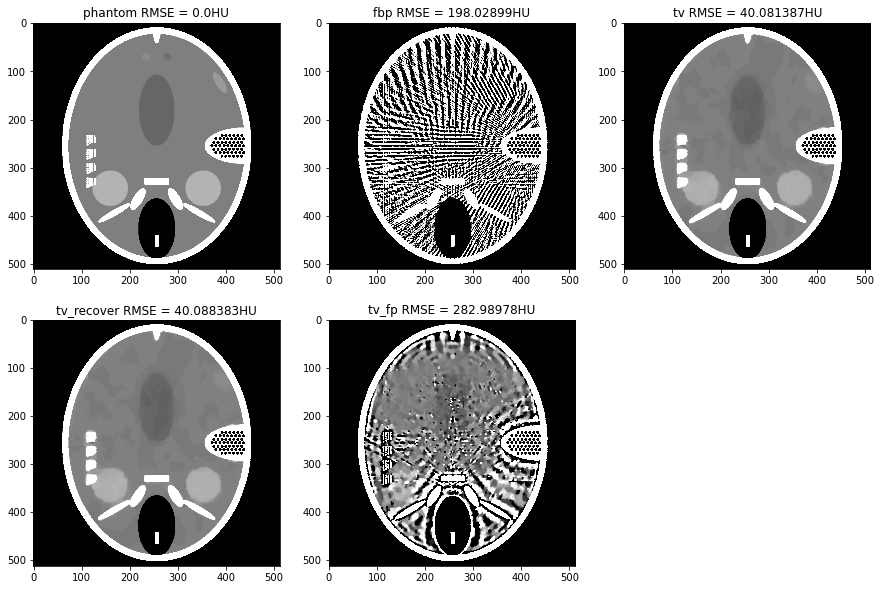

/home/local/PARTNERS/dw640/mnt/women_health_internal/dufan.wu/recon_wtih_fp/sparse/sparse/sparse_120_n0_-1.0_beta_5e-05


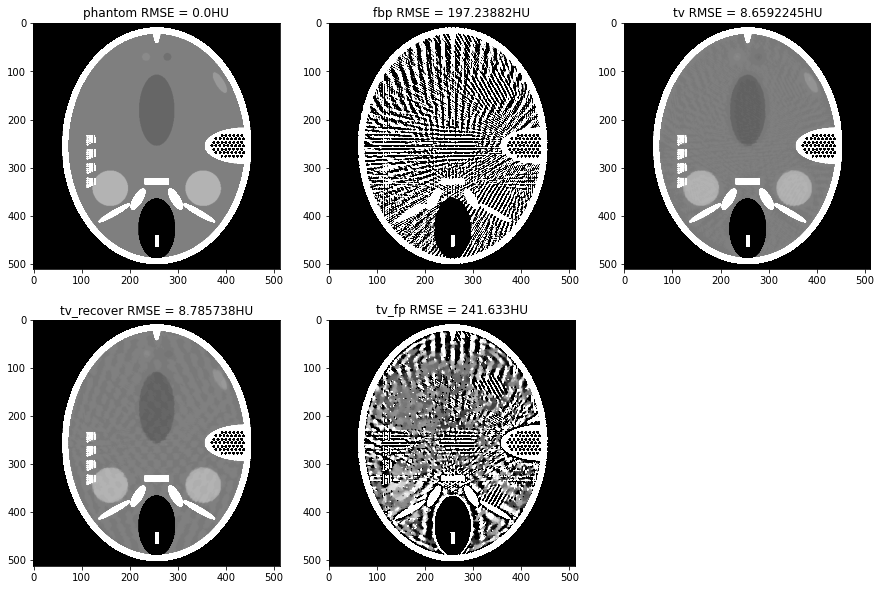

/home/local/PARTNERS/dw640/mnt/women_health_internal/dufan.wu/recon_wtih_fp/sparse/sparse/sparse_120_n0_-1.0_beta_0.0001


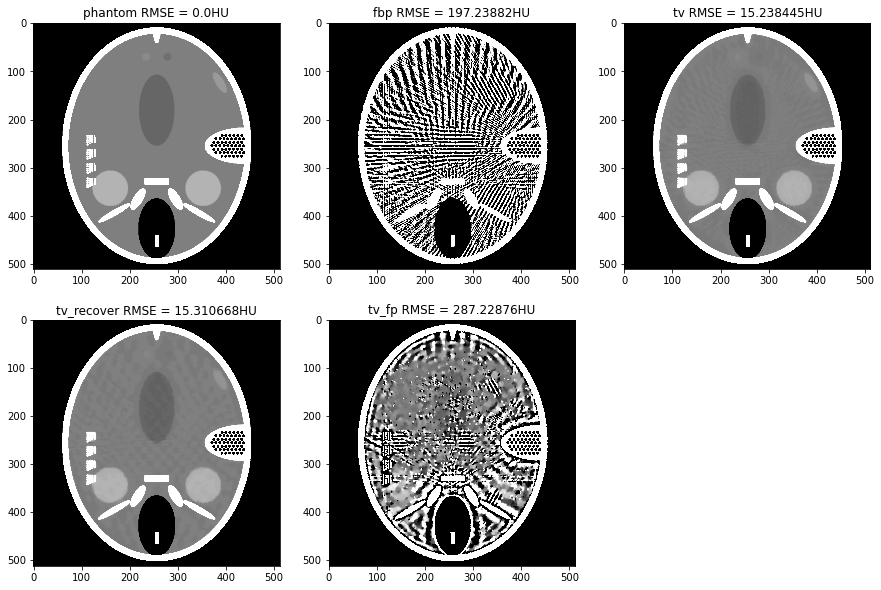

In [48]:
folders = glob.glob(os.path.join(working_dir, 'sparse/*'))
for folder in folders:
    names = ['phantom', 'fbp', 'tv', 'tv_recover', 'tv_fp']
    imgs = []
    for name in names:
        img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(folder, name + '.nii')))
        # imgs.append(img.astype(np.float32))
        imgs.append(mask_fov(img + 1000, 512) - 1000)

    print(folder)
    plt.figure(figsize=[15, 10])
    for i in range(len(imgs)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imgs[i][0], 'gray', vmin=25, vmax=75)
        rmse = np.sqrt(np.mean((imgs[i] - imgs[0])**2))
        plt.title(names[i] + ' RMSE = ' + str(rmse) + 'HU')
    plt.show()

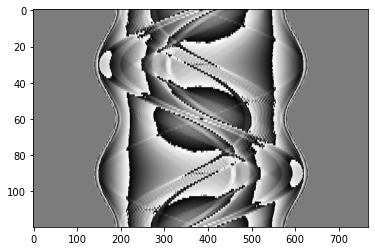

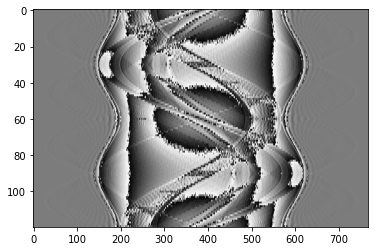

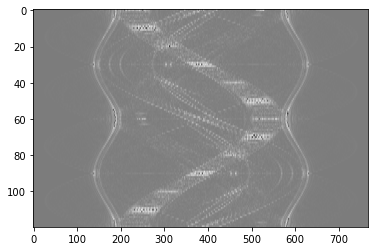

In [4]:
folder = os.path.join(working_dir, 'phantom/sparse_120_n0_-1.0_beta_5e-05')
names = ['prj', 'prj_fp', 'prj_fp_diff']
for name in names:
    prj = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(folder, name + '.nii.gz')))

    plt.figure()
    plt.imshow(prj[0], 'gray', aspect='auto')